In [1]:
%load_ext oct2py.ipython
%matplotlib inline
%config InlineBackend.figure_formats = ['pdf','svg']

\author{Fan Jiang, 11310129}

# Section 1

This section is a MATLAB session.

In [2]:
%%octave -o n,s,v,ar,v1,ma,v2,x

n = (1:1000)';
s= sin (0.075*pi*n);
v = 0.8*randn(1000,1); % Random noise part
ar = [1,1/2]; % Autoregression coefficients.
v1 = filter(1,ar,v); % Noise signal. Applies a 1-D digital filter.
ma = [1, -0.8, 0.4 , -0.2];
v2 = filter(ma,1,v);
x = s + v1;

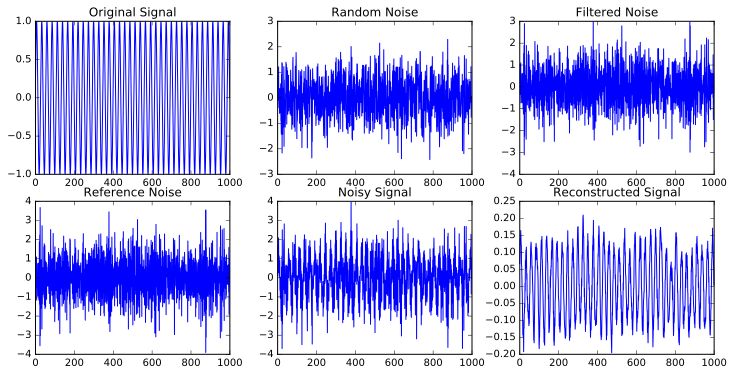

In [3]:
from scipy.signal import wiener
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(10,5))
sp=plt.subplot(231)
plt.plot(s)
sp.set_title("Original Signal")
sp=plt.subplot(232)
plt.plot(v)
sp.set_title("Random Noise")
sp=plt.subplot(233)
plt.plot(v1)
sp.set_title("Filtered Noise")
sp=plt.subplot(234)
plt.plot(v2)
sp.set_title("Reference Noise")
sp=plt.subplot(235)
plt.plot(x)
sp.set_title("Noisy Signal")
sp=plt.subplot(236)
plt.plot(wiener(x,7,sum(v2)))
sp.set_title("Reconstructed Signal");
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0);

# Section 2

Wiener filter equation:
$$\begin{cases}
\boldsymbol{R}_x\boldsymbol{h}_{opt}=\boldsymbol{r}_{dx}\\
\epsilon_{min}=r_d(0)-\boldsymbol{r}_{dx}^T \boldsymbol R_x^{-1}\boldsymbol r_{dx}\end{cases}$$

As $r_x(0)=0,r_x(1)=0.5,r_x(2)=2$, $\boldsymbol{r}_{dx}=[0.5,0.25,0.05]^T$.

In [23]:
import numpy as np

R_x=np.matrix([
        [0,  0.5, 2],
        [0.5,0  , 2],
        [2,  0.5, 0]]);

h_opt=np.linalg.inv(R_x)*(np.matrix([0.5,0.25,0.05]).T)
h_opt

matrix([[-0.08 ],
        [ 0.42 ],
        [ 0.145]])

# Section 3

Design of FIR adaptive filter.

In [147]:
%%octave -o N,nvar,noise,B,x,d,signal
pkg load signal
N=500;
signal=2*(randi(2,1,500)-1)-1;
nvar=0.01;
noise=nvar*randn(1, N);
B=[0.3 0.9 0.3];
x=filter(B,1,signal)+noise;
x=x';
d=[zeros(1,10) signal(1:end-10)];

In [189]:
Wt = np.zeros(11)
damp = 0.1
yests = []
ys = []
mse = []
def est(X, y):
    global Wt;
    X = np.squeeze(X)
    yest = Wt.dot(X)
    c = (y - yest) / X.dot(X)
        # clip to cmax ?
    Wt += damp * c * X
    return yest

for t in range(int(N)-10):
    X = x[t:t+11]
    y = signal.T[t]  # predict
    yest = est(X, y)
    ys += [y]
    yests += [yest]
    mse+=[np.sum((np.squeeze(np.array(ys))-np.array(yests))**2)]

y = np.squeeze(np.array(ys))
yest = np.array(yests)
err = yest - y

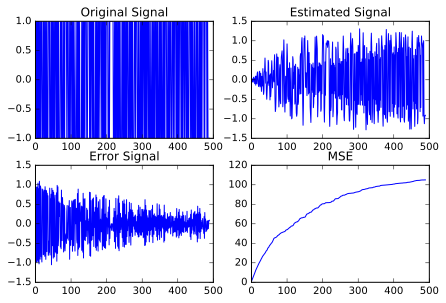

In [196]:
fig=plt.figure()
plt.subplot(221).set_title("Original Signal")
plt.plot(y)
plt.subplot(222).set_title("Estimated Signal")
plt.plot(yest)
plt.subplot(223).set_title("Error Signal")
plt.plot(err);
plt.subplot(224).set_title("MSE")
plt.plot(mse);
fig.tight_layout(pad=0.0, w_pad=0.0, h_pad=0.0);